In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder

In [3]:
df_weather = pd.read_csv('weatherAUS.csv')

In [4]:
#Quitamos los valores nulos
for i in range (0,df_weather.shape[1]):
    if type(df_weather[(df_weather.columns)[i]][0]) == str:
        df_weather[(df_weather.columns)[i]].fillna((df_weather[(df_weather.columns)[i]].mode())[0], inplace = True)
    else:
        df_weather[(df_weather.columns)[i]].fillna(df_weather[(df_weather.columns)[i]].mean(), inplace = True)


In [5]:
features = df_weather.columns
attributes = features[:-1]
target = features[-1]

In [6]:
X = df_weather[attributes]
X



,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2008-12-01,Albury,13.4,22.900000,0.6,5.468232,7.611178,W,44.00000,W,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.468232,7.611178,WNW,44.00000,NNW,...,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.468232,7.611178,WSW,46.00000,W,...,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.468232,7.611178,NE,24.00000,SE,...,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.468232,7.611178,W,41.00000,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.400000,0.0,5.468232,7.611178,E,31.00000,SE,...,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,No
145456,2017-06-22,Uluru,3.6,25.300000,0.0,5.468232,7.611178,NNW,22.00000,SE,...,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,No
145457,2017-06-23,Uluru,5.4,26.900000,0.0,5.468232,7.611178,N,37.00000,SE,...,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,No
145458,2017-06-24,Uluru,7.8,27.000000,0.0,5.468232,7.611178,SE,28.00000,SSE,...,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,No


In [7]:
y = df_weather[target]
y

#Cambiamos los nos por 0 y los sies por 1
y[y == 'No'] = 0
y[y == 'Yes'] = 1

y = pd.to_numeric(y, errors='coerce')
y

C:\Users\Gabriel\AppData\Local\Temp/ipykernel_5752/228769230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'No'] = 0
C:\Users\Gabriel\AppData\Local\Temp/ipykernel_5752/228769230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'Yes'] = 1


0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    0
Name: RainTomorrow, Length: 145460, dtype: int64

In [8]:
max_depth = 4
min_samples_leaf = 10

In [9]:
#No vamos a trabajar en este caso con las variables categóricas
j = 0
for i in range((X.shape[1])):

    if type(X[(X.columns)[j]][0]) == str:
        X.drop(X.columns[j], axis = 'columns', inplace=True)

    else:
        j += 1    


E:\Users\Gabriel\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
arbol = tree.DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=max_depth,
                                    min_samples_leaf = min_samples_leaf)
arbol.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=10)

In [11]:
arbol.tree_

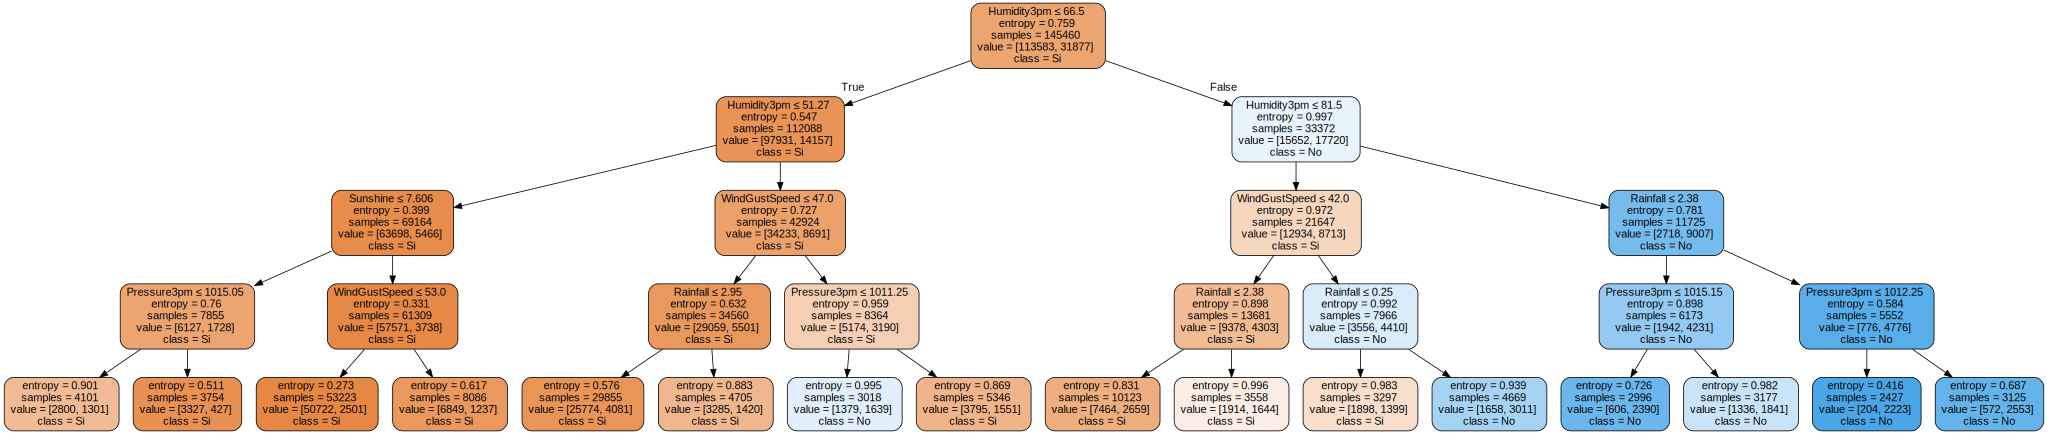

In [12]:
import graphviz 
import matplotlib
import matplotlib.pyplot as plt

dot_data = tree.export_graphviz(arbol, out_file=None, 
                         feature_names=X.columns,  
                         class_names=['Si', 'No'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [445]:
print(accuracy_score(y, arbol.predict(X)))

0.8351780558229066


In [446]:
arbol.score(X,y)

0.8351780558229066

In [447]:
print(roc_auc_score(y, arbol.predict(X)))

0.6888801133033907


In [265]:
import seaborn as sns
import matplotlib.pyplot as plt

##### Vemos que humedad, efectivamente, es un muy buen atributo de corte, de hecho, es el mejor y el es por el que elige partir el algoritmo.

C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


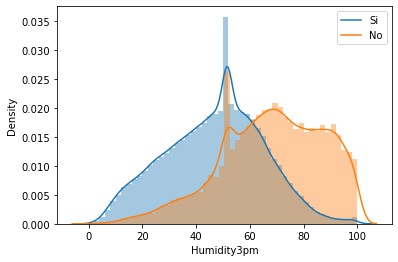

In [272]:

sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 0, "Humidity3pm"])
sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 1, "Humidity3pm"])
plt.legend(["Si", "No"])


##### Mientras que Wind no es tan evidente, aunque se utiliza

C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


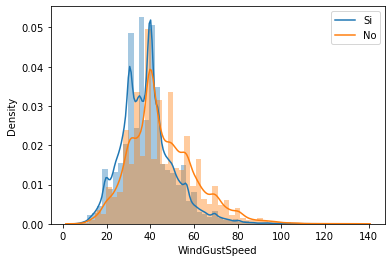

In [274]:
sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 0, "WindGustSpeed"])
sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 1, "WindGustSpeed"])

plt.legend(["Si", "No"])


##### Y sunshine, otra variable de corte que usa scikit, tampoco se puede apreciar bien el punto de corte con distplot

C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


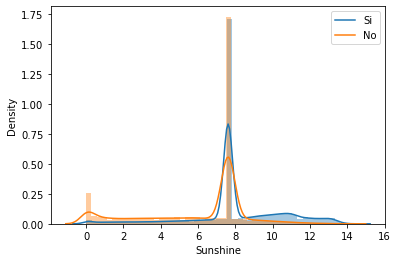

In [278]:

sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 0, "Sunshine"])
sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 1, "Sunshine"])
plt.legend(["Si", "No"])


##### Y por último miramos otras variables que no han sido usadas por scikit para ver la diferencia en el estilo de gráficas

C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


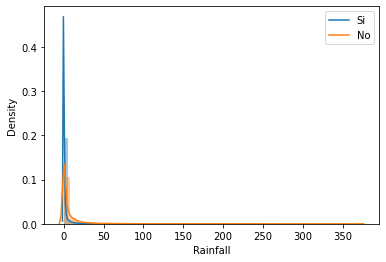

In [279]:

sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 0, "Rainfall"])
sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 1, "Rainfall"])
plt.legend(["Si", "No"])

C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


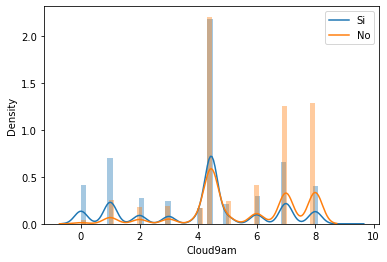

In [282]:
sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 0, "Cloud9am"])
sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 1, "Cloud9am"])
plt.legend(["Si", "No"])

C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Javi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


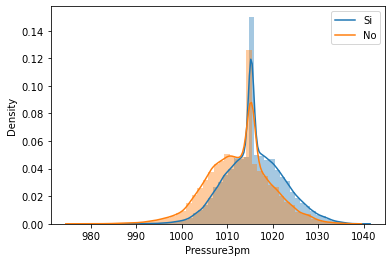

In [449]:
sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 0, "Pressure3pm"])
sns.distplot(df_weather.loc[df_weather["RainTomorrow"] == 1, "Pressure3pm"])
plt.legend(["Si", "No"])